<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bias and Variance


---

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li></ul></li><li><span><a href="#Bias-and-Variance-Trade-Off" data-toc-modified-id="Bias-and-Variance-Trade-Off-2">Bias and Variance Trade-Off</a></span><ul class="toc-item"><li><span><a href="#Exploring-the-Bias-Variance-Trade-Off" data-toc-modified-id="Exploring-the-Bias-Variance-Trade-Off-2.1">Exploring the Bias-Variance Trade-Off</a></span></li><li><span><a href="#Brain-and-Body-Weight-Mammal-Data-Set" data-toc-modified-id="Brain-and-Body-Weight-Mammal-Data-Set-2.2">Brain and Body Weight Mammal Data Set</a></span></li><li><span><a href="#Making-a-Prediction" data-toc-modified-id="Making-a-Prediction-2.3">Making a Prediction</a></span></li><li><span><a href="#Making-a-Prediction-From-a-Sample" data-toc-modified-id="Making-a-Prediction-From-a-Sample-2.4">Making a Prediction From a Sample</a></span></li><li><span><a href="#Low-bias-model" data-toc-modified-id="Low-bias-model-2.5">Low bias model</a></span></li></ul></li><li><span><a href="#Balancing-Bias-and-Variance" data-toc-modified-id="Balancing-Bias-and-Variance-3">Balancing Bias and Variance</a></span></li><li><span><a href="#Comparing-Test-Performance-With-a-Null-Baseline" data-toc-modified-id="Comparing-Test-Performance-With-a-Null-Baseline-4">Comparing Test Performance With a Null Baseline</a></span><ul class="toc-item"><li><span><a href="#Go-back-to-Step-1-and-try-adding-new-variables-and-transformations" data-toc-modified-id="Go-back-to-Step-1-and-try-adding-new-variables-and-transformations-4.1">Go back to Step 1 and try adding new variables and transformations</a></span></li></ul></li><li><span><a href="#Additional-Resources" data-toc-modified-id="Additional-Resources-5">Additional Resources</a></span></li></ul></div>

## Learning Objectives

### Core
- Understand the concepts of bias, variance and irreducible error
- Learn how the bias and variance of a model relate to the complexity of a model
- Visualize the tradeoff between bias and variance.

### Target
- Understand the quantities entering the bias, variance and irreducible error terms

## Bias and Variance Trade-Off
---

The **bias-variance tradeoff** is widely used in machine learning as a conceptual way of comparing and contrasting different models. The question we are interested in is how much we will be able to reduce the expected prediction error, how much does the error depend on the particular model choice and on the available training data. Typically, the total expected error can be split into three different parts:

**Bias** is error due to the difference between the correct model and the predicted value.

**Variance** is error due to the variability in the prediction due to different training sets.

**Irreducible error** is the error which remains even with the correct model choice and enough representative data.

Bias and Variance are related to the complexity of the chosen model:

- As model complexity **increases**, bias **decreases**.
- As model complexity **increases**, variance **increases**.
- The irreducible error remains regardless of the model we choose.

![](./assets/biasVsVarianceImage.png)

- Visually, we are building a model where the bulls-eye is the goal.
- Each individual hit is a model prediction.
- The success of our model (low variance, low bias) critically depends on the training data present.

**Examples:**

- **Linear regression:** Low variance, High bias.
    - If we train with a different subset of the training set, the model will be about the same. Hence, the model has low variance.
    - The resulting model will predict the training points incorrectly (unless they happen to be perfectly linear). Hence, it has high bias.
   
- **High-order polynomial (as compared to linear regression):** Med-low variance, Med-high bias, compared to linear regression.

**Expressing bias and variance mathematically:**

It can be helpful understanding these terms by looking at how we can decompose the total error into them mathematically. (We will skip the derivations!)

In general, we might assume that there is a "true" model $f$ capturing the true relationship between the predictors and the outcome variable. On top of this relationship there is some completely random noise component $\epsilon$, for example stemming from a normal distribution with mean zero and standard deviation $\sigma$. Then the true relationship takes the form

$$
y = f(x)+\epsilon
$$

By building a model, we try to estimate $f$ by some function $\hat{f}$. We measure the goodness of fit for example by the mean squared error. If we are able to guess the right parametrization for $f$, we will get good results if we have enough representative training data, but never better results than the remaining noise level. If we did not guess the right functional form for $f$, our predictions will always deviate to some extent from the true values, and the same happens if we do not have enough training data.

Let's define the error of our prediction as the expected value of our squared error. Note this error is not based on any particular fitted model, but on the family of potential models given a training set (i.e. all fitted models made from all possible training data samples).

$$E[(y - \hat{f}(x))^2] = {\rm Bias}[\hat{f}(x)]^2 + {\rm Var}[\hat{f}(x)] + \sigma^2$$

This states the expected error is based on only three components: **bias**, **variance**, and **irreducible error**.

Breaking the bias and variance further down:

$${\rm Bias}[\hat{f}(x)] = E[\hat{f}(x) - f(x)].$$

- The bias is the expected difference between our model and the true model.

$${\rm Var}[\hat{f}(x)] = E[\hat{f}(x)^2] - E[\hat{f}(x)]^2.$$

- The variance is how much our predictions vary about the mean across all training sets. ($E[\hat{f}(x)]$ is our predictor's mean prediction.)

- The irreducible error stems from noise in the problem itself.

**Some common questions:**

From the math above, we can answer a few common questions:

Can a model have high bias given one dataset and low bias for another?
- Yes. It may happen that on one particular training set a linear model leads to good results, but on another one not.

Is the MSE for a fitted linear regression the same thing as the bias?
- Only if there is no noise and no variance. Bias is the expected error of a model averaged across all training sets. This way, if we happen to get a lucky MSE fitting a model on a particular training set, this does not mean we will have a low bias overall.

### Exploring the Bias-Variance Trade-Off

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Brain and Body Weight Mammal Data Set

This is a [data set](http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt) of the average weight of the body (in kg) and the brain (in g) for 62 mammal species. We'll use this dataset to investigate bias vs. variance. Let's read it into Pandas and take a quick look:

In [2]:
path = './data/mammals.txt'
cols = ['brain','body']
mammals = pd.read_csv(path, sep='\t', names=cols, header=0)
mammals.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [3]:
mammals.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


We're going to focus on a smaller subset in which the body weight is less than 200 kg.

In [4]:
# Only keep rows in which the body weight is less than 200 kg.
mammals = mammals[mammals.body < 200]
mammals.shape

(51, 2)

We're now going to pretend that there are only 51 mammal species in existence. In other words, we are pretending that this is the entire data set of brain and body weights for **every known mammal species**.

Let's create a scatterplot (using [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/)) to visualize the relationship between brain and body weight:

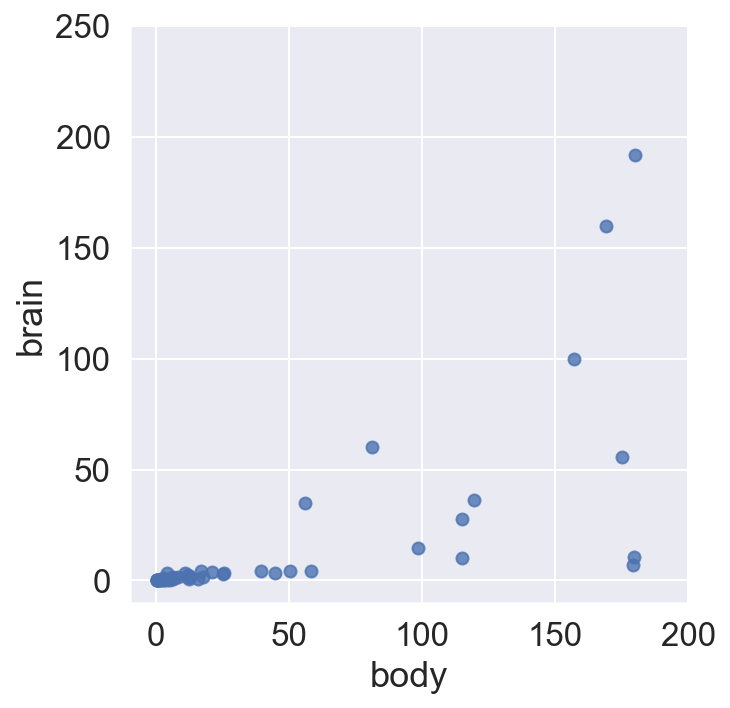

In [5]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, fit_reg=False);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

There appears to be a relationship between brain and body weight for mammals.

### Making a Prediction

Now let's pretend that a **new mammal species** is discovered. We measure the body weight of every member of this species we can find and calculate an **average body weight of 100 kgs**. We want to **predict the average brain weight** of this species (rather than measuring it directly). How might we do this?

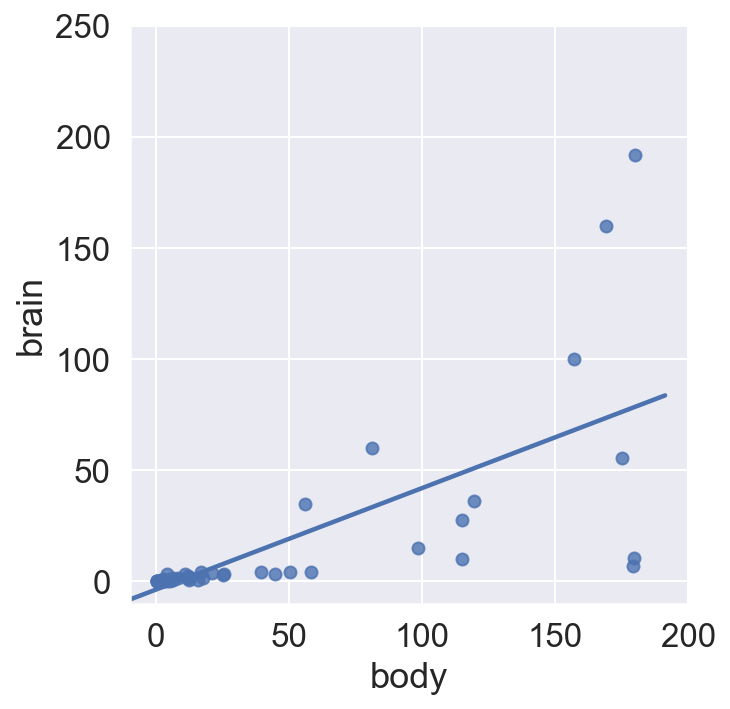

In [6]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

We drew a straight line that appears to best capture the relationship between brain and body weight. So, we might predict that our new species has a brain weight of about 45 g, as that's the approximate y value when x=100.

This is known as a "linear model" or a "linear regression model."

### Making a Prediction From a Sample

Earlier, we assumed that this dataset contained every known mammal species. That's very convenient, but **in the real world, all you ever have is a sample of data**. This may sound like a contentious statement, but the point of machine learning is to generalize from a sample to the population. If you already have data for the entire population, then you have no need for machine learning -- you can apply statistics directly and get optimal answers!

Here, a more realistic situation would be to only have brain and body weights for (let's say) half of the 51 known mammals.

When that new mammal species (with a body weight of 100 kg) is discovered, we still want to make an accurate prediction for its brain weight, but this task might be more difficult, as we don't have all of the data we would ideally like to have.

Let's simulate this situation by assigning each of the 51 observations to one of two groups.

In [7]:
# Set a random seed for reproducibility.
np.random.seed(12345)

# Randomly assign every observation to either group 1 or group 2.
mammals['group'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,group
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,2
5,27.660,115.0,1


In [8]:
mammals.group.value_counts()

2    33
1    18
Name: group, dtype: int64

**Important:** We only have only the data for either the one or the other of the two groups available. We still have 51 known mammal species, but we know the brain and body weight only for the species in the group which we are given as a training dataset. Accordingly, we will arrive at different predictions.

We can now tell Seaborn to create two plots in which the left plot only uses the data from **group 1** and the right plot only uses the data from **group 2**:

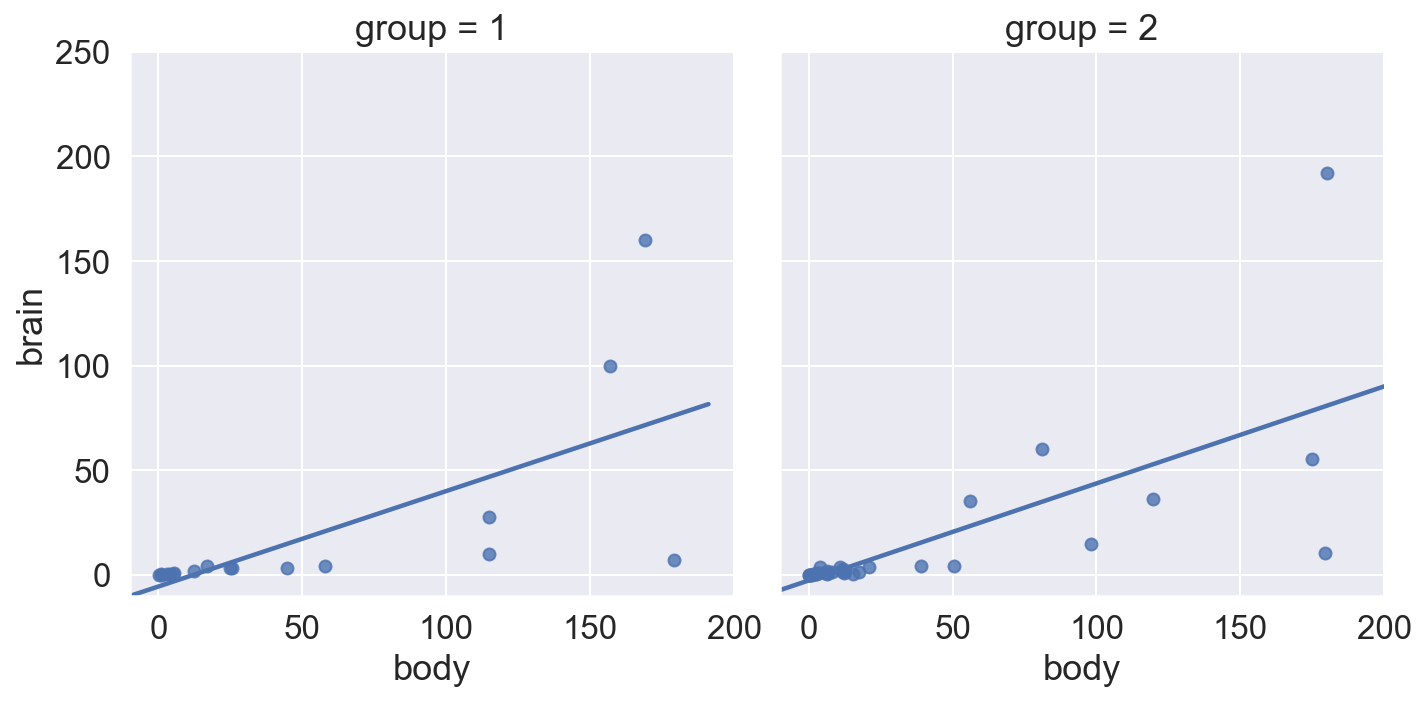

In [9]:
# col='group' subsets the data by group and creates two separate plots.
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='group');
plt.xlim(-10, 200);
plt.ylim(-10, 250);

The line looks pretty similar between the two plots, despite the fact that they used separate samples of data. In both cases, we would predict a brain weight of about 45 g.

It's easier to see the degree of similarity by placing them on the same plot:

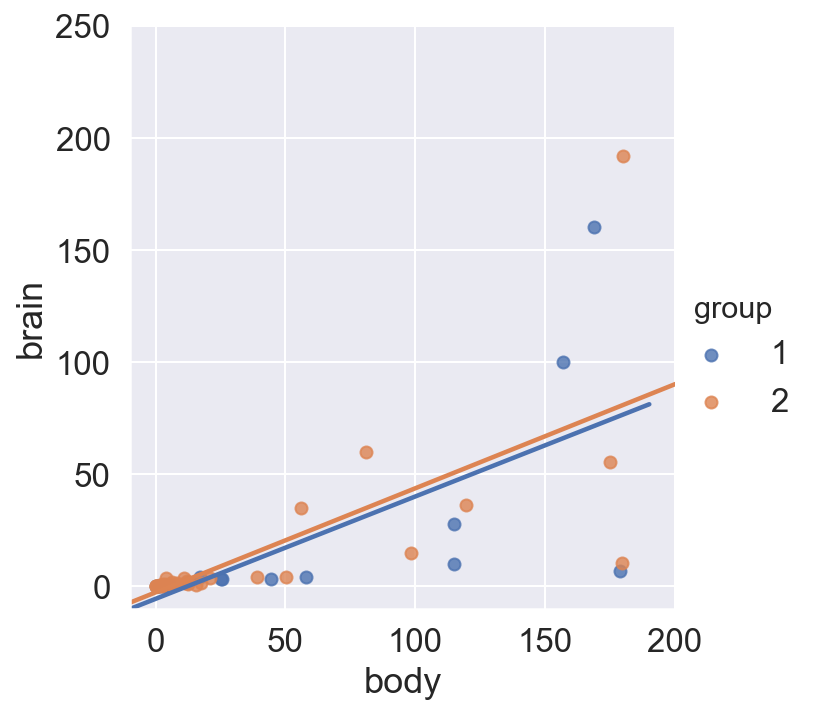

In [10]:
# hue='group' subsets the data by group and creates a single plot.
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='group');
plt.xlim(-10, 200);
plt.ylim(-10, 250);

So, what was the point of this exercise? This was a visual demonstration of a high-bias, low-variance model.

- It's **high bias** because it doesn't fit the data particularly well.
- It's **low variance** because it doesn't change much depending on which observations happen to be available in which group.

### Low bias model

What would a **low-bias, high-variance** model look like? Let's try polynomial regression with an eighth-order polynomial.

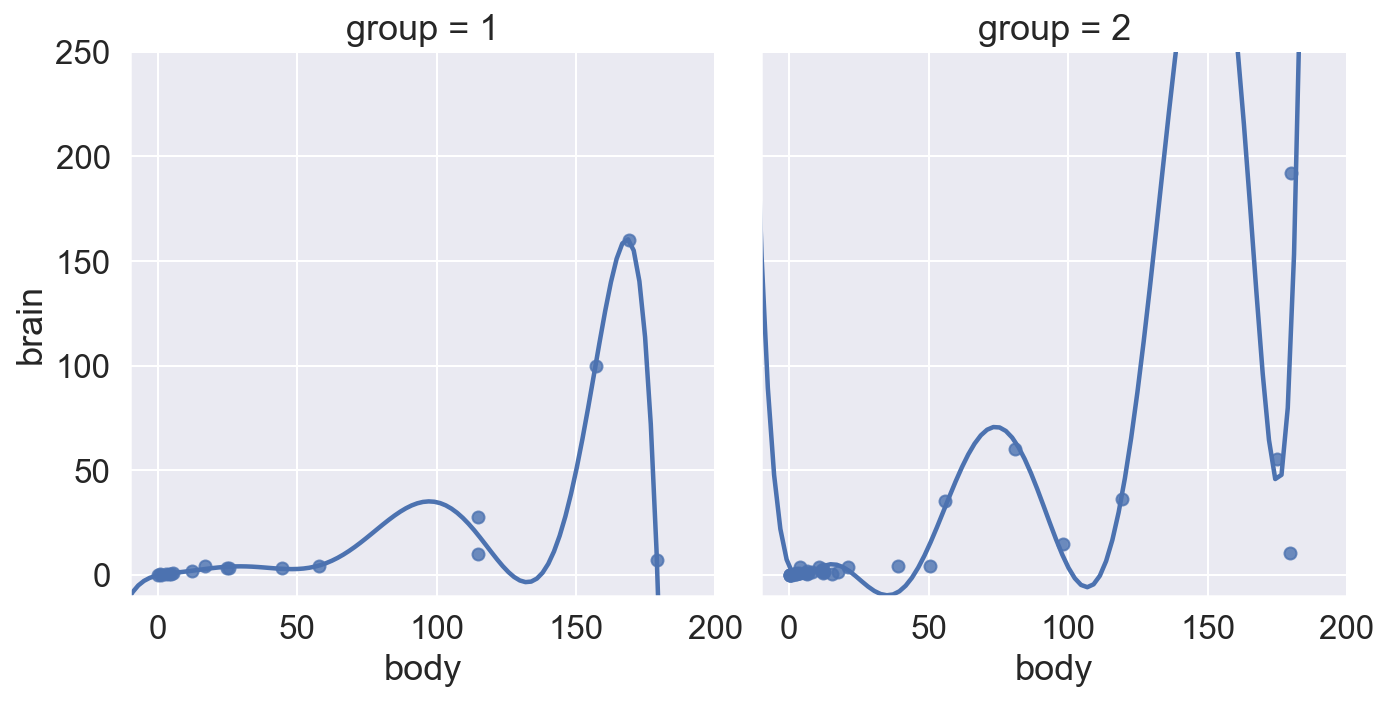

In [11]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='group', order=8);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

- It's **low bias** because the models match the data effectively.
- It's **high variance** because the models are widely different, depending on which observations happen to be available in that group. (For a body weight of 100 kg, the brain weight prediction would be 40 kg in one group and 0 kg in the other!)

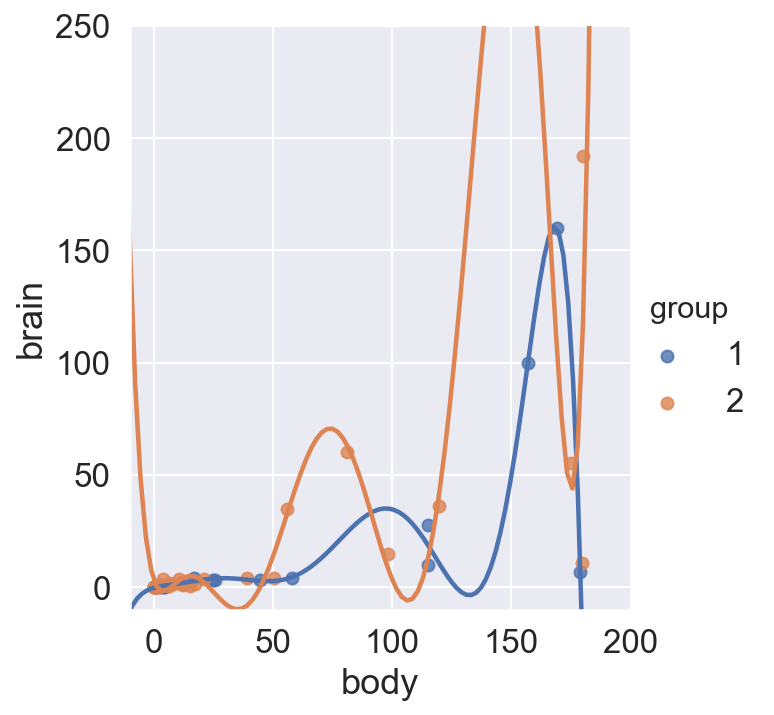

In [12]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='group', order=8);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

## Balancing Bias and Variance
Can we find a middle ground?

Perhaps we can create a model that has **less bias than the linear model** and **less variance than the eighth order polynomial**?

Let's try a second order polynomial instead:

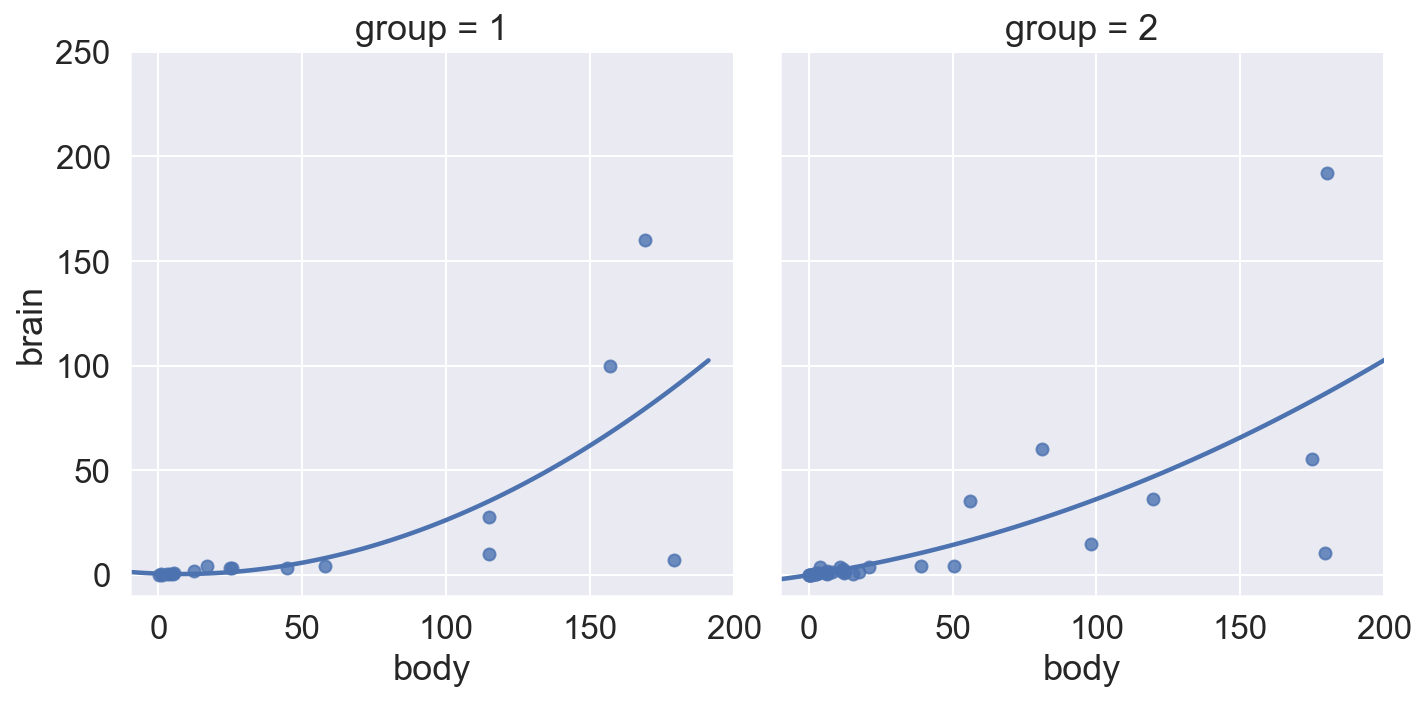

In [13]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='group', order=2);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

This seems better. In both the left and right plots, **it fits the data well, but not too well**.

This is the essence of the **bias-variance trade-off**: You are seeking a model that appropriately balances bias and variance and thus will generalize to new data (known as "out-of-sample" data). It
should match our training data well (moderate bias) yet be low variance for out-of-sample data (moderate variance).

![Bias-variance tradeoff](./assets/bias_variance.png)

- **Training error**: Decreases as model complexity increases.
- **Testing error**: Is minimized at the optimum model complexity.

Finding the model with the best bias-variance tradeoff is achieved best by using cross-validation and testing on a hold-out dataset.

## Independent Practice

### Comparing Model Complexity

We are still trying to predict mammal brain size based on the body weight.

Let's see how the model performs when adding complexity.

- Scale the data using PolynomialFeatures for degrees 1 to 10
- Standardise the data
- Fit a linear regression for each degree
- Evaluate each model with cross validation (5 folds)
- How much complexity performs best?

In [43]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [33]:
mammals.head()

,brain,body,group
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,2
5,27.660,115.0,1


In [47]:
X = mammals[['body']]
y = mammals[['brain']]

# Standardize the data first, so you don't have to standardize for each degree of the pf to come
scaler = StandardScaler()
Xstd = mammals_scaler.fit_transform(X)

In [61]:
# Polynomial feature with degrees: 1 to 10
scores = []
scores_std = []
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for i in range(1,11):
    pf = PolynomialFeatures(degree=i, include_bias=True)

    X_pf = pf.fit_transform(Xstd)     # ... the fit_transform operation returns a np.array...
    X_pf = pd.DataFrame(X_pf,columns=pf.get_feature_names())     # ... so, throw into a df, to see it

    # Build the linear regression based on this scaled data:
    lr_pf = LinearRegression()
    lr_pf.fit(X_pf, y)

    # Perform 5-fold cross validation
    scores.append([i,cross_val_score(lr_pf, X_pf, y, cv=kf)])
    scores_std.append([i,cross_val_score(lr_pf, X_pf, y, cv=kf).mean(),cross_val_score(lr_pf, X_pf, y, cv=kf).std()])

scores = pd.DataFrame(scores, columns=['pf_dof','cvs'])
scores_std = pd.DataFrame(scores_std, columns=['pf_dof','cvs_mean','cvs_std'])

scores_std

,pf_dof,cvs_mean,cvs_std
0,1,-43.120839,77.461149
1,2,-68.837076,132.207152
2,3,-83.954620,160.319153
3,4,-92.413470,176.185880
4,5,-85.977392,167.265983
5,6,-81.746293,161.224733
6,7,-93.308858,184.242708
7,8,-95.679797,190.389991
8,9,-111.051553,183.772581
9,10,-145.511587,180.353005


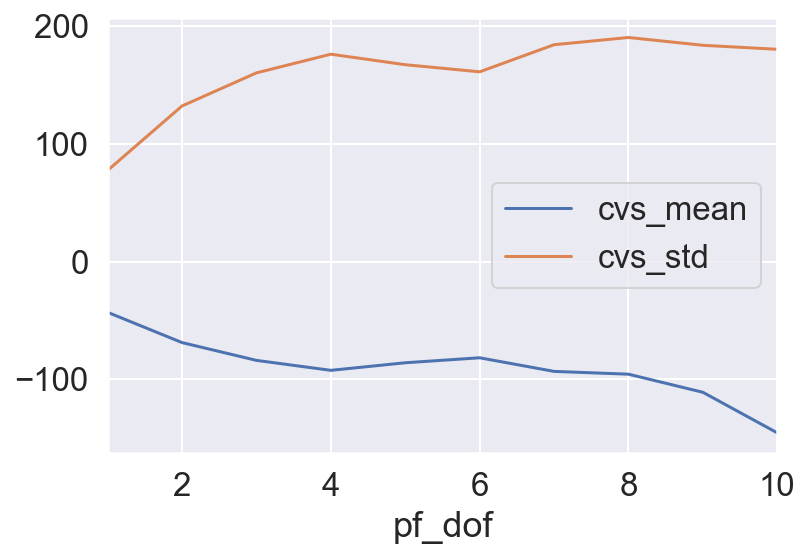

In [63]:
scores_std.plot.line(x='pf_dof');

# not very good predictor, as it's high variance (high cvs_std) across all dof's.
# Note - high bias would also give correlations moving around low correlations, while low bias but high var would give 
# correlations moving around high correlations

## Additional Resources
- [Bias Variance](http://scott.fortmann-roe.com/docs/BiasVariance.html)
- University of Washington [slides](https://courses.cs.washington.edu/courses/cse546/12wi/slides/)
- [Polynomial Regression data fit](https://arachnoid.com/polysolve/)